In [130]:
import warnings
warnings.filterwarnings("ignore")

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [132]:
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import preprocessing 

In [133]:
data = pd.read_csv("D:\YUKTA\Assignment\DS\Decision Tree\heart_disease.csv")

In [134]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,fixed defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,normal,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,True,NaN,downsloping,fixed defect,4


**Description of the data**

age:	Age in years

Gender:	Gender ; Male - 1, Female - 0

cp: 	Chest pain type

trestbps:	Resting blood pressure

chol:	cholesterol measure

fbs:	(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

restecg:	"ecg observation at resting condition,  

        -- Value 0: normal
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria"
        
thalch:	maximum heart rate achieved

exang:	exercise induced angina

oldpeak:	ST depression induced by exercise relative to rest

slope:	the slope of the peak exercise ST segment

thal:	Thal

num:	target 0=no heart disease; 1,2,3,4 = stages of heart disease 

# EDA:

In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    bool   
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(2), float64(1), int64(5), object(5)
memory usage: 79.9+ KB


In [136]:
data.shape

(908, 13)

In [137]:
data.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


**Age:**

The average age of the individuals is approximately 54 years. The age distribution is broadly ranging from 29 to 77 years.

In [138]:
data.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

**Oldpeak** column has 62 missing values.

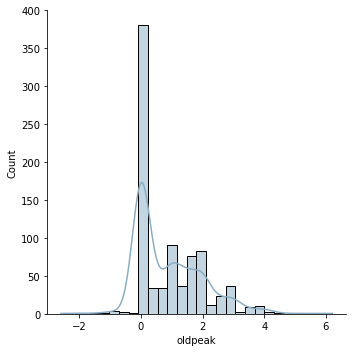

In [139]:
sns.displot(data=data, x='oldpeak', kde=True)

In [140]:
mode = data["oldpeak"].mode()[0]

In [141]:
data["oldpeak"].fillna(mode, inplace=True)

In [142]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

Now the dataset has no missing values

**Unique Values:**

In [143]:
print(data.nunique())

age          49
sex           2
cp            4
trestbps     85
chol        228
fbs           2
restecg       3
thalch      122
exang         2
oldpeak      53
slope         3
thal          3
num           5
dtype: int64


In [144]:
data.cp.value_counts()

asymptomatic       495
non-anginal        203
atypical angina    165
typical angina      45
Name: cp, dtype: int64

In [145]:
data.fbs.value_counts()

False    723
True     185
Name: fbs, dtype: int64

In [146]:
data.restecg.value_counts()

normal              542
lv hypertrophy      187
st-t abnormality    179
Name: restecg, dtype: int64

In [147]:
data.exang.value_counts()

False    535
True     373
Name: exang, dtype: int64

In [148]:
data.slope.value_counts()

flat           453
upsloping      298
downsloping    157
Name: slope, dtype: int64

In [149]:
data.thal.value_counts()

normal               353
reversable defect    337
fixed defect         218
Name: thal, dtype: int64

In [150]:
data.num.value_counts()

0    399
1    265
2    109
3    107
4     28
Name: num, dtype: int64

In [151]:
# Dividing the variables as categorical and numerical variables:-
cat_list=[]
num_list=[]


for i in data.columns:
    unique_values = len(data[i].unique())
    if unique_values<10:
        cat_list.append(i)
    else:
        num_list.append(i)

In [152]:
print(cat_list)
print('\n',num_list)

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'num']

 ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']


**Outlier Analysis:**

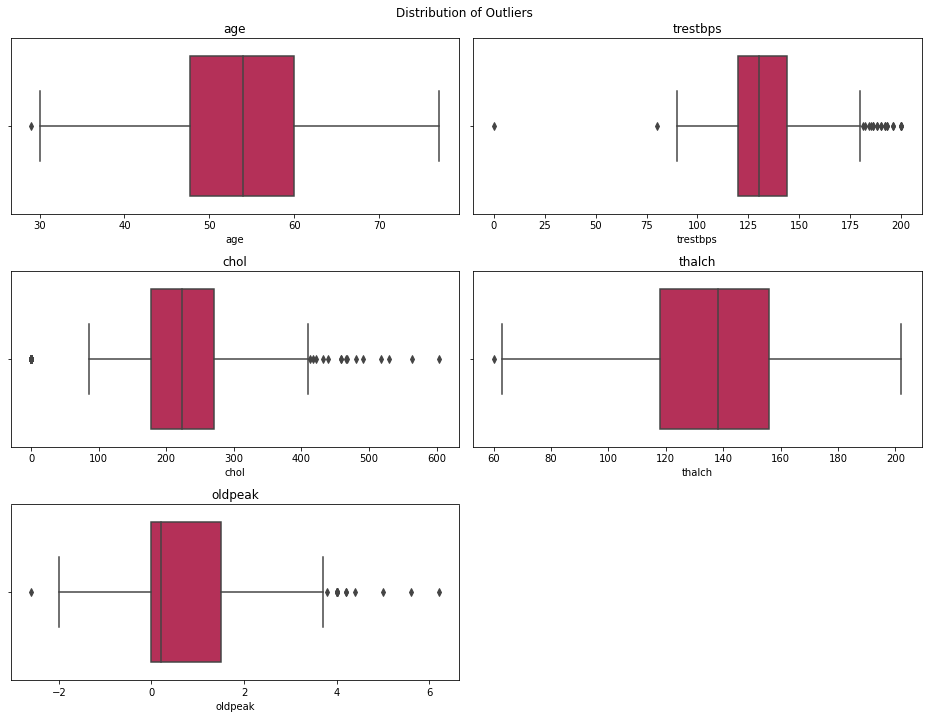

In [153]:
k=1
plt.figure(figsize=(13,13))
plt.suptitle("Distribution of Outliers")

for i in data.loc[:,num_list]:
    plt.subplot(4,2,k)
    sns.boxplot(x = i, data = data.loc[:,num_list], palette = 'rocket_r')
    plt.title(i)
    plt.tight_layout()
    k+=1

In [154]:
out_list = ['age', "trestbps", "chol", "oldpeak", 'thalch']

In [155]:
# remove outliers;
for i in data.loc[:,out_list]:
    
    Q1 = data[i].quantile(0.25)
    Q3 = data[i].quantile(0.75)
    IQR = Q3 - Q1
    up_lim=Q3+1.5 *IQR
    low_lim=Q1-1.5 *IQR
    
    data.loc[data[i]>up_lim,i]=up_lim
    data.loc[data[i]<low_lim,i]=low_lim

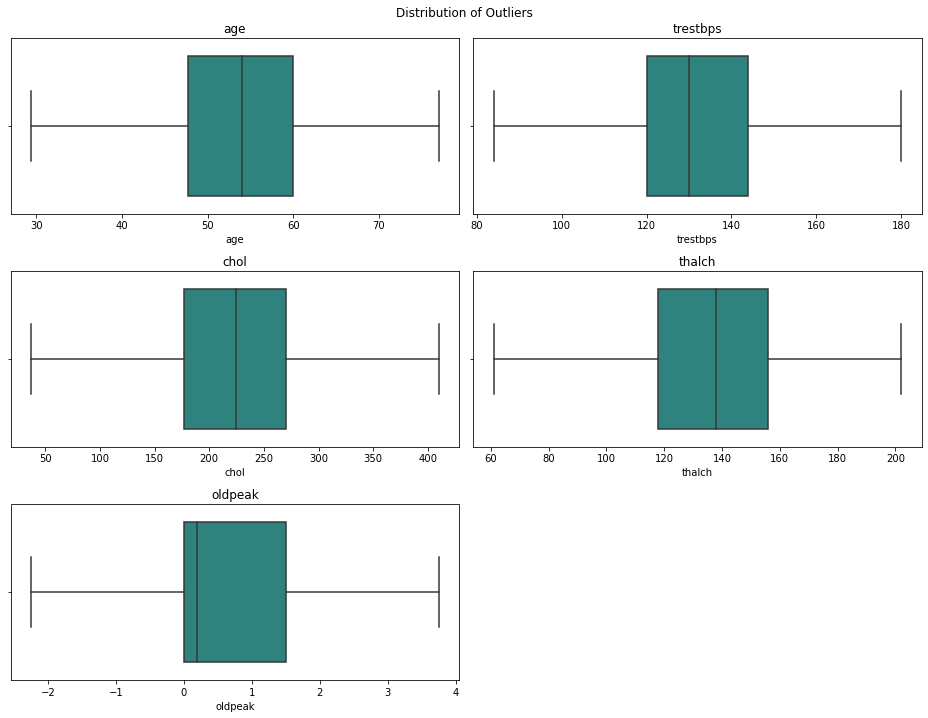

In [156]:
k=1
plt.figure(figsize=(13,13))
plt.suptitle("Distribution of Outliers")

for i in data.loc[:,num_list]:
    plt.subplot(4,2,k)
    sns.boxplot(x = i, data = data.loc[:,num_list], palette = 'viridis')
    plt.title(i)
    plt.tight_layout()
    k+=1

**Visual Representation:**

Distribution plots for numeric varaibles:

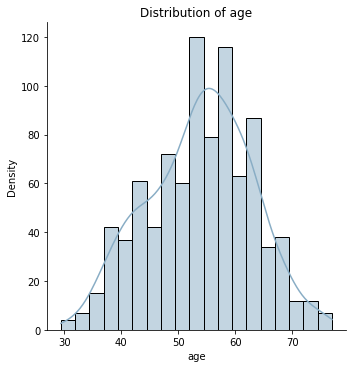

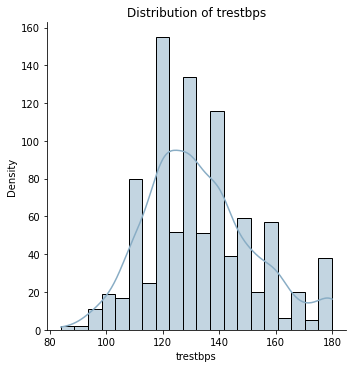

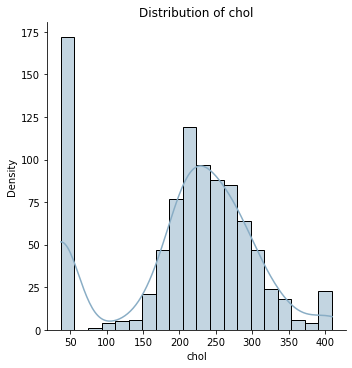

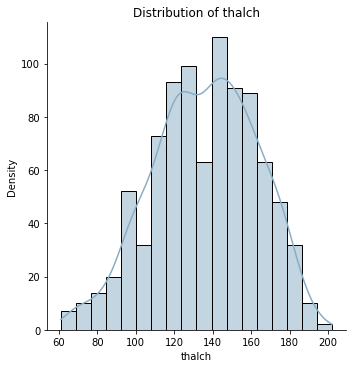

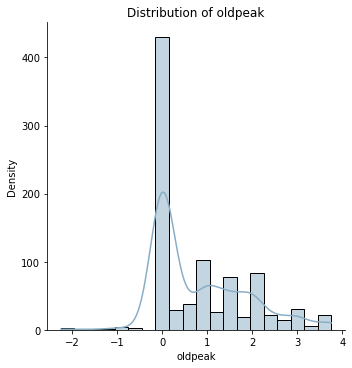

In [157]:
# Plotting displots
for col in num_list:
    sns.displot(data[col], kde=True, palette="hue")
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.show()

All the numeric varaibles approximately have a normal distribution.

Except for **oldpeak** which has a positively skewed distribution.

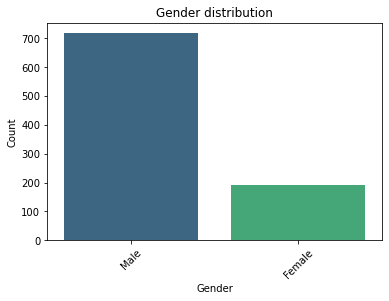

In [158]:
sns.countplot(x="sex", data= data, palette = 'viridis')

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender distribution')
plt.xticks(rotation=45)

plt.show()

The data has more number of males than females

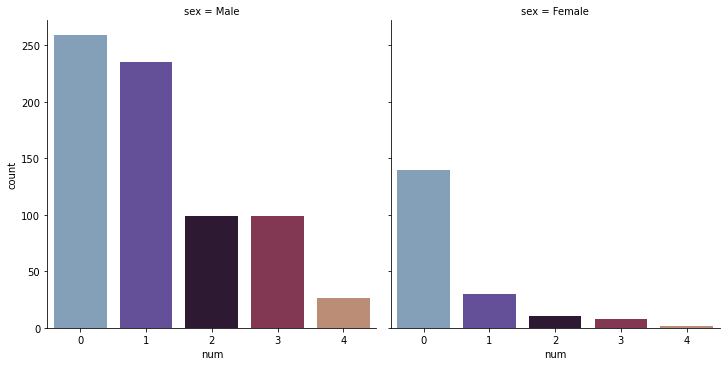

In [159]:
sns.catplot(x='num', col='sex', kind='count', data=data, palette='twilight')

Maximum number of people in the data have no heart disease

More number of males have heart disease of stage 1 whereas approximately same number of males have stage 2 and 3 heart disease

Very few number of females have heart disease maximum being the stage 1.

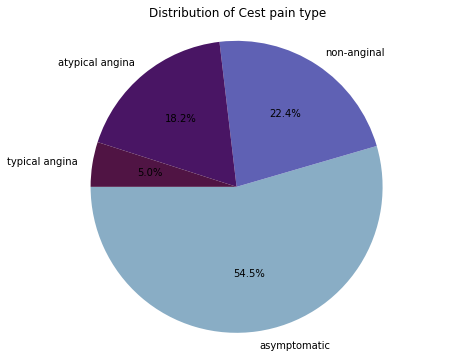

In [160]:
cp_counts = data['cp'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(cp_counts, labels=cp_counts.index, autopct='%1.1f%%', startangle=180)
plt.title('Distribution of Cest pain type')
plt.axis('equal') 
plt.show()

54.5% of people have **asymptomatic** chest pain type

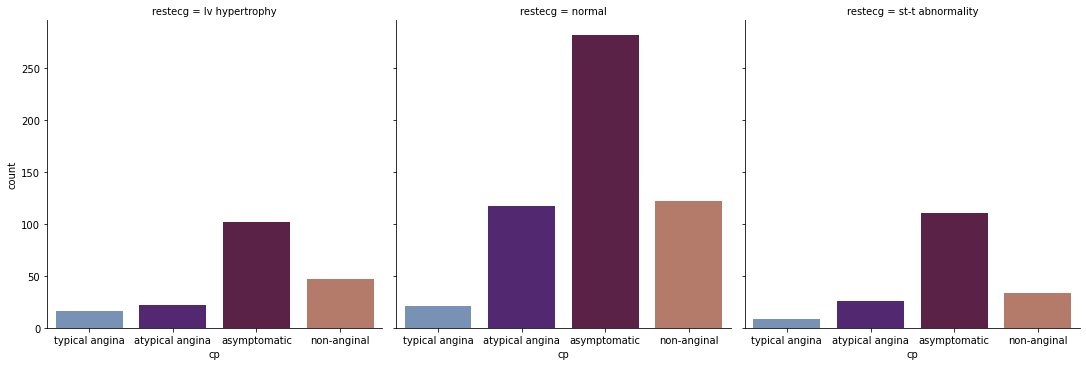

In [161]:
sns.catplot(x='cp', col='restecg', kind='count', data=data, palette='twilight')

<AxesSubplot:xlabel='slope', ylabel='count'>

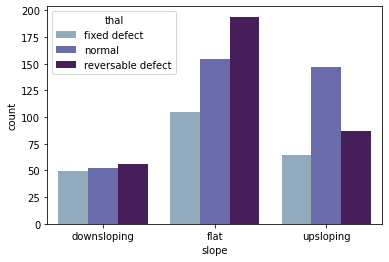

In [162]:
sns.countplot(data=data, x='slope', hue='thal')

<AxesSubplot:xlabel='thal', ylabel='count'>

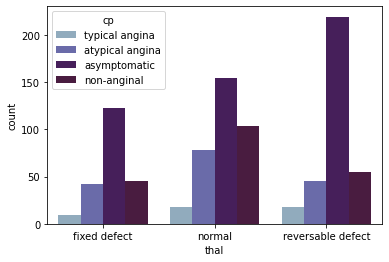

In [163]:
sns.countplot(data=data, x='thal', hue='cp')

In [164]:
cat_list

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'num']

<AxesSubplot:>

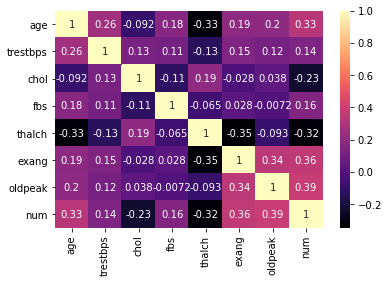

In [165]:
sns.heatmap(data.corr(), annot=True, cmap='magma')

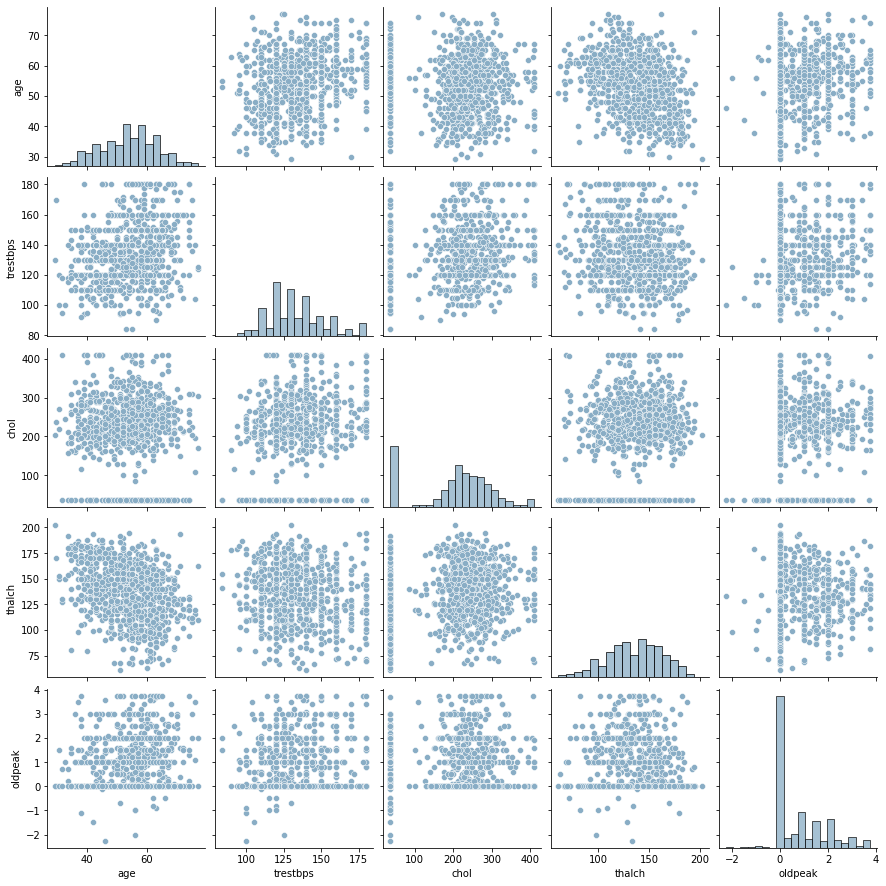

In [166]:
sns.pairplot(data.loc[:,num_list])

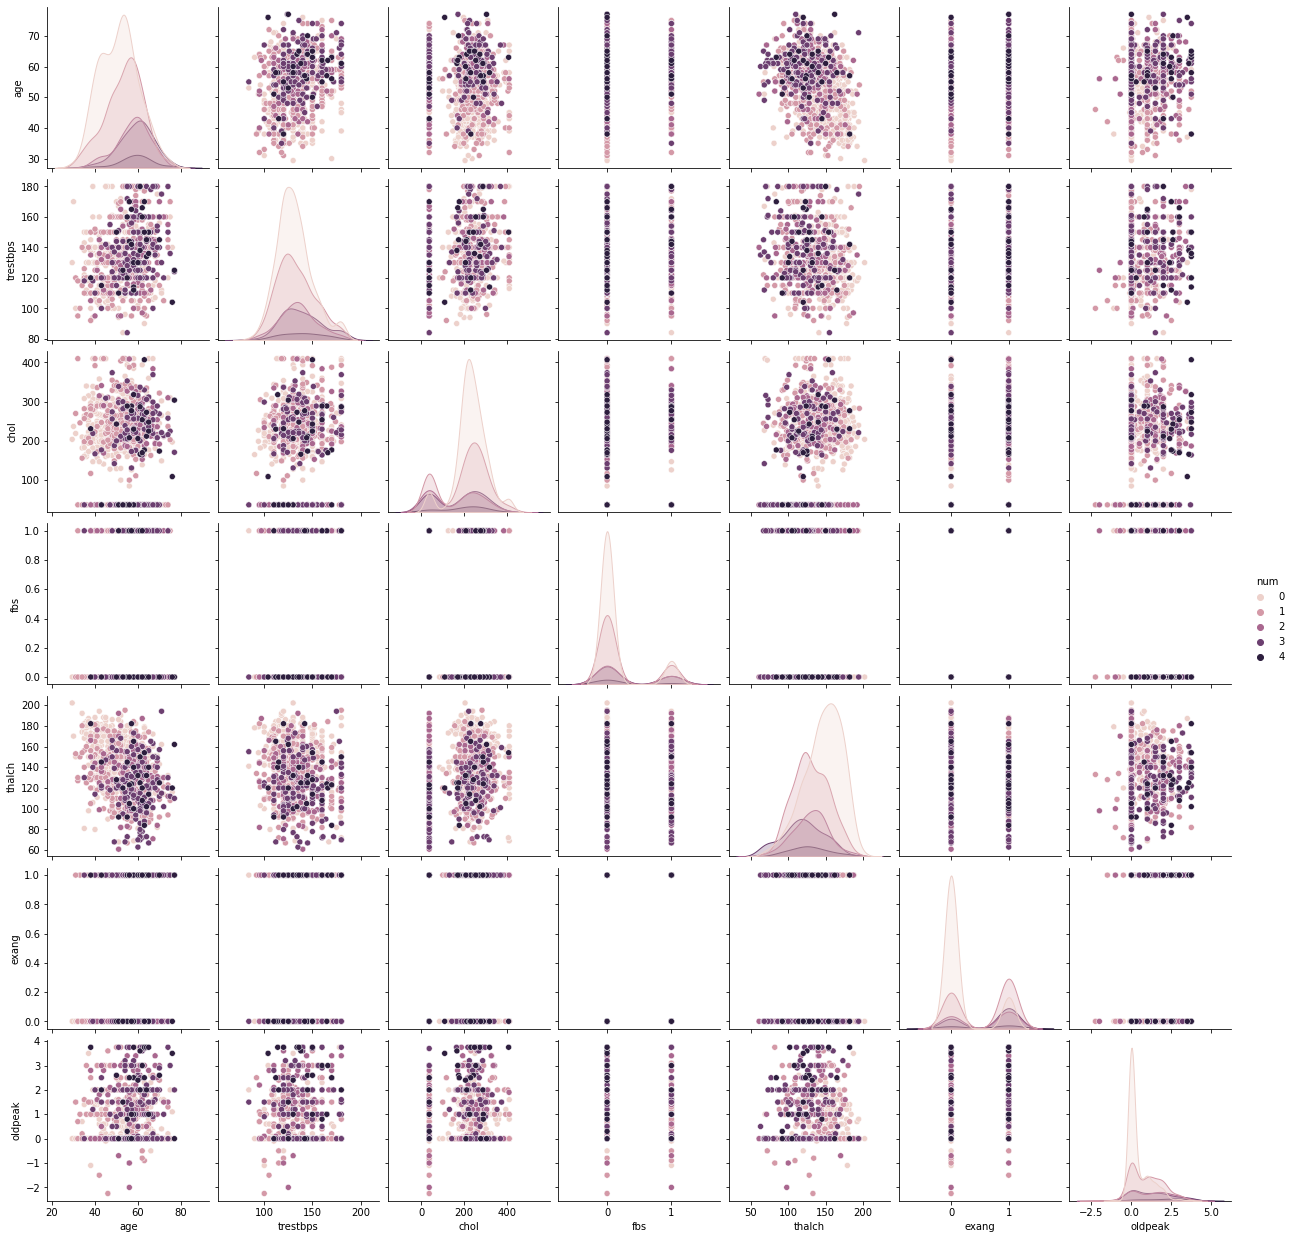

In [167]:
sns.pairplot(data, hue='num')

# Feature Engineering:

In [168]:
data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63.0,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,fixed defect,0
1,41.0,Male,atypical angina,135.0,203.0,False,normal,132.0,False,0.0,flat,fixed defect,0
2,57.0,Male,asymptomatic,140.0,192.0,False,normal,148.0,False,0.4,flat,fixed defect,0
3,52.0,Male,typical angina,118.0,186.0,False,lv hypertrophy,190.0,False,0.0,flat,fixed defect,0
4,57.0,Male,asymptomatic,110.0,201.0,False,normal,126.0,True,1.5,flat,fixed defect,0


In [169]:
cat_list

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'num']

In [170]:
from sklearn.preprocessing import LabelEncoder

In [171]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

**Encoding the categorical varaibles:**

In [172]:
data['sex'] = label_encoder.fit_transform(data['sex'])
data['cp'] = label_encoder.fit_transform(data['cp'])
data['fbs'] = label_encoder.fit_transform(data['fbs'])
data['restecg'] = label_encoder.fit_transform(data['restecg'])
data['exang'] = label_encoder.fit_transform(data['exang'])
data['slope'] = label_encoder.fit_transform(data['slope'])
data['thal'] = label_encoder.fit_transform(data['thal'])

In [173]:
data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63.0,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,0
1,41.0,1,1,135.0,203.0,0,1,132.0,0,0.0,1,0,0
2,57.0,1,0,140.0,192.0,0,1,148.0,0,0.4,1,0,0
3,52.0,1,3,118.0,186.0,0,0,190.0,0,0.0,1,0,0
4,57.0,1,0,110.0,201.0,0,1,126.0,1,1.5,1,0,0


# Train-Test splitting the data: 

In [174]:
x = data.iloc[:,0:12]
y = data['num']

In [175]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,63.0,1,3,145.0,233.000,1,0,150.0,0,2.3,0,0
1,41.0,1,1,135.0,203.000,0,1,132.0,0,0.0,1,0
2,57.0,1,0,140.0,192.000,0,1,148.0,0,0.4,1,0
3,52.0,1,3,118.0,186.000,0,0,190.0,0,0.0,1,0
4,57.0,1,0,110.0,201.000,0,1,126.0,1,1.5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
903,53.0,1,0,125.0,36.875,0,1,120.0,0,1.5,2,0
904,62.0,1,0,166.0,170.000,0,2,120.0,1,3.0,1,1
905,56.0,1,2,170.0,36.875,0,0,123.0,1,2.5,0,1
906,56.0,1,2,144.0,208.000,1,2,105.0,1,0.0,0,0


In [176]:
y

0      0
1      0
2      0
3      0
4      0
      ..
903    4
904    4
905    4
906    4
907    4
Name: num, Length: 908, dtype: int64

In [177]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40) 

# Decision Tree model:

**Building Decision Tree Classifier using Entropy Criteria:**

In [178]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=3)

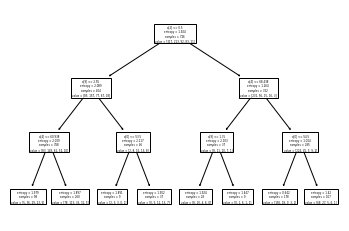

In [179]:
#PLot the decision tree
tree.plot_tree(model);

In [180]:
x.head(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,63.0,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0


<Figure size 720x432 with 0 Axes>

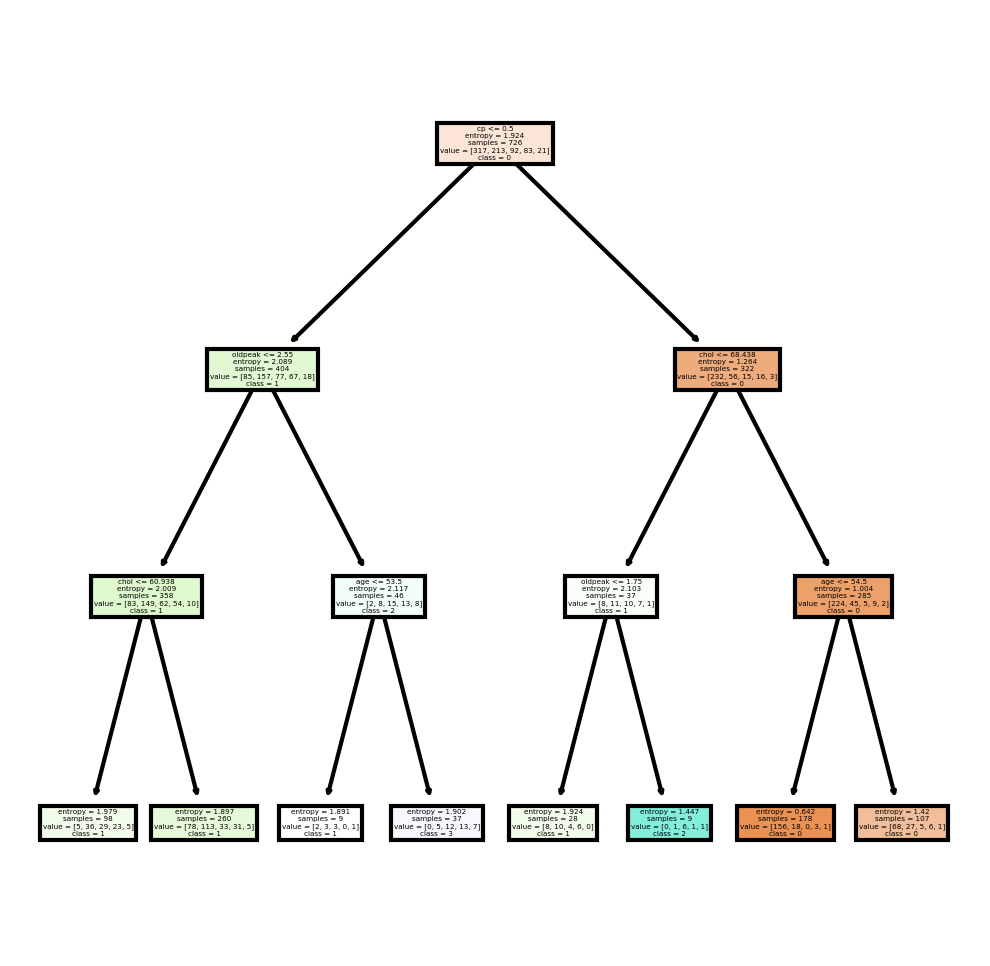

In [181]:
fn = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'thal']
cn = ['0', '1', '2', '3', '4']

plt.figure(figsize=(10, 6))
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True); 

In [182]:
text = tree.export_text(model,max_depth=3)  
print(text)

|--- feature_2 <= 0.50
|   |--- feature_9 <= 2.55
|   |   |--- feature_4 <= 60.94
|   |   |   |--- class: 1
|   |   |--- feature_4 >  60.94
|   |   |   |--- class: 1
|   |--- feature_9 >  2.55
|   |   |--- feature_0 <= 53.50
|   |   |   |--- class: 1
|   |   |--- feature_0 >  53.50
|   |   |   |--- class: 3
|--- feature_2 >  0.50
|   |--- feature_4 <= 68.44
|   |   |--- feature_9 <= 1.75
|   |   |   |--- class: 1
|   |   |--- feature_9 >  1.75
|   |   |   |--- class: 2
|   |--- feature_4 >  68.44
|   |   |--- feature_0 <= 54.50
|   |   |   |--- class: 0
|   |   |--- feature_0 >  54.50
|   |   |   |--- class: 0



In [183]:
model.feature_importances_ 

array([0.10288083, 0.        , 0.50550085, 0.        , 0.25988249,
       0.        , 0.        , 0.        , 0.        , 0.13173583,
       0.        , 0.        ])

In [184]:
feature_imp = pd.Series(model.feature_importances_,index=fn).sort_values(ascending=False) 
feature_imp

cp          0.505501
chol        0.259882
oldpeak     0.131736
age         0.102881
sex         0.000000
trestbps    0.000000
fbs         0.000000
restecg     0.000000
thalch      0.000000
exang       0.000000
slope       0.000000
thal        0.000000
dtype: float64

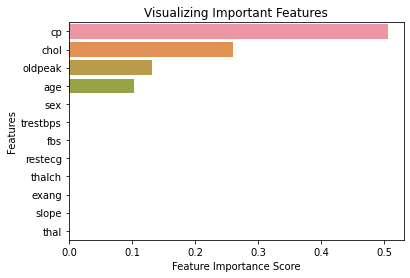

In [185]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

Here we can see that the varaibles **cp, chol, oldpeak and age** are the important variables while determing the type of heart disease.

In [186]:
#Predicting on test data
y_pred = model.predict(x_test) # predicting on test data set 
pd.Series(y_pred).value_counts() # getting the count of each category  

1    92
0    82
3     5
2     3
dtype: int64

In [187]:
y_pred

array([0, 1, 1, 1, 0, 1, 1, 1, 3, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 2, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 2, 1, 1, 0, 0, 1, 0, 3, 1, 1, 1, 1, 3, 1, 3, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 2, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 3, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0], dtype=int64)

In [188]:
pd.crosstab(y_test,y_pred)

col_0,0,1,2,3
num,,,,
0,60,21,1,0
1,9,40,2,1
2,4,12,0,1
3,7,15,0,2
4,2,4,0,1


In [189]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [190]:
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')
print(f'Confusion Matrix:\n{conf_matrix}')

Accuracy: 0.5604395604395604
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.73      0.73        82
           1       0.43      0.77      0.56        52
           2       0.00      0.00      0.00        17
           3       0.40      0.08      0.14        24
           4       0.00      0.00      0.00         7

    accuracy                           0.56       182
   macro avg       0.31      0.32      0.29       182
weighted avg       0.51      0.56      0.51       182

Confusion Matrix:
[[60 21  1  0  0]
 [ 9 40  2  1  0]
 [ 4 12  0  1  0]
 [ 7 15  0  2  0]
 [ 2  4  0  1  0]]


**CONCLUSION**

**The model achieved an accuracy of approximately 56%.**

Based on precision we can see that the model fails to predict class 2 and class 4 correctly.

The overall performance across all classes is low, as indicated by the **macro average metrics.**

# Hyperparameter tuning:

In [191]:
X = data.drop('num', axis=1)
y = data['num']

In [192]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [193]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [194]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8]
}

In [195]:
# Initialize the Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)

In [196]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

In [197]:
# Fit the model to the training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 4, 8],
                         'min_samples_split': [2, 5, 10, 20]},
             verbose=2)

In [198]:
# Find the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

Best parameters found:  {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 8, 'min_samples_split': 2}


With the help of **Hyperparameter tuning method** we get that Decision tree model built using **entropy criteria** and **max_depth 7** is the best model.

In [199]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [200]:
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

Accuracy: 0.45604395604395603
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.58      0.61        89
           1       0.33      0.62      0.43        48
           2       0.00      0.00      0.00        22
           3       0.20      0.06      0.09        17
           4       0.00      0.00      0.00         6

    accuracy                           0.46       182
   macro avg       0.23      0.25      0.23       182
weighted avg       0.41      0.46      0.42       182



**Building Decision Tree Classifier (CART) using Gini Criteria:**

In [201]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3) 

In [202]:
model_gini.fit(x_train, y_train) 

DecisionTreeClassifier(max_depth=3)

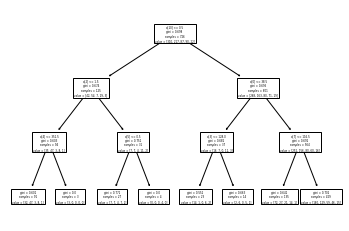

In [203]:
tree.plot_tree(model_gini);

<Figure size 720x432 with 0 Axes>

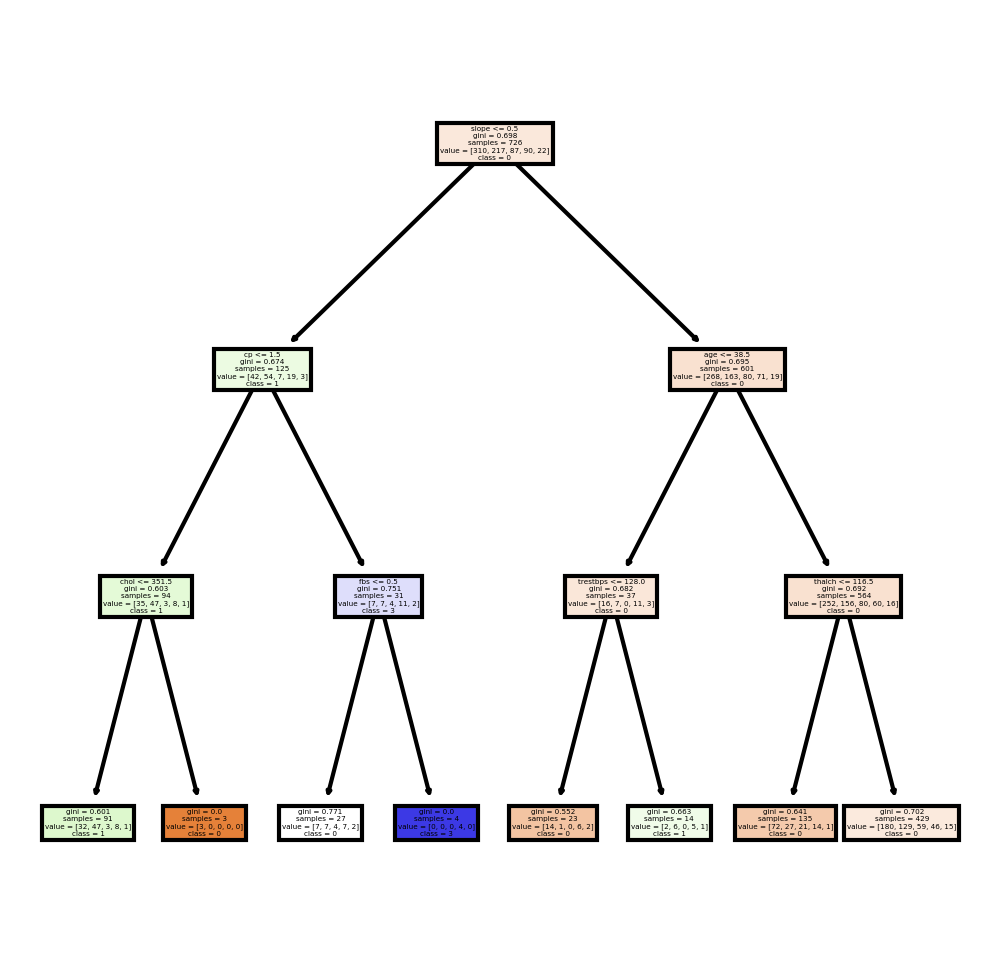

In [204]:
fn = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'thal']
cn = ['0', '1', '2', '3', '4']

plt.figure(figsize=(10, 6))
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model_gini,
               feature_names = fn, 
               class_names=cn,
               filled = True); 

In [205]:
feature_imp_gini = pd.Series(model_gini.feature_importances_,index=fn).sort_values(ascending=False) 
feature_imp_gini

slope       0.217230
cp          0.197274
trestbps    0.151879
thalch      0.115596
fbs         0.115264
age         0.108633
chol        0.094125
sex         0.000000
restecg     0.000000
exang       0.000000
oldpeak     0.000000
thal        0.000000
dtype: float64

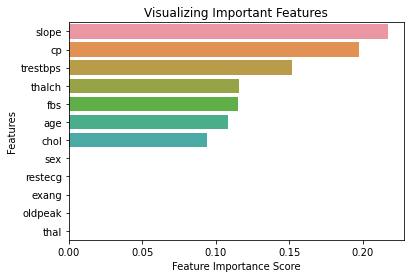

In [206]:
sns.barplot(x=feature_imp_gini, y=feature_imp_gini.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

Here we can see that the varaibles **slope, cp, trestbps, thalch, fbs, chol, age** are the important variables while determing the type of heart disease.

In [207]:
# Evaluating the model:

y_pred = model_gini.predict(x_test)
pd.Series(y_pred).value_counts()
pd.crosstab(y_test,y_pred)

col_0,0,1,3
num,,,
0,83,4,2
1,38,10,0
2,17,5,0
3,16,0,1
4,4,2,0


In [208]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [209]:
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')
print(f'Confusion Matrix:\n{conf_matrix}')

Accuracy: 0.5164835164835165
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.93      0.67        89
           1       0.48      0.21      0.29        48
           2       0.00      0.00      0.00        22
           3       0.33      0.06      0.10        17
           4       0.00      0.00      0.00         6

    accuracy                           0.52       182
   macro avg       0.27      0.24      0.21       182
weighted avg       0.41      0.52      0.41       182

Confusion Matrix:
[[83  4  0  2  0]
 [38 10  0  0  0]
 [17  5  0  0  0]
 [16  0  0  1  0]
 [ 4  2  0  0  0]]


Using the **gini criteria** to build the decision tree model we get an **overall accuracy of 51%**

Also based on precision the model fails to predict heart disease of type 4

# CONCLUSION:

**A] For Decision Tree Classifier using Entropy Criteria:**

1) The model achieved an accuracy of approximately **56%.**

2) The varaibles **cp, chol, oldpeak and age** are the important variables while determing the type of heart disease.


**B] For Decision Tree Classifier (CART) using Gini Criteria:**

1) The overall model accuracy is 51%.

2) The varaibles **slope, cp, trestbps, thalch, fbs, chol, age** are the important variables while determing the type of heart disease.


**C] For Hyperparameter Tuning method:**

1) The Decision tree model built using **entropy criteria and max_depth 7 is the best model** with an accuracy of 45%